- clean data
- count by neighbourhood to get which neighbour hood have more apt/house listed
- show density of apt in particular neighbourhood on map [WOW]
- type of room 
- host with most listing
- price by neighbourhood
- review ( avg review of neighbourhood) 
- no of listing host have
- avg available days listed

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
import folium
from folium.plugins import FastMarkerCluster

In [24]:
data=pd.read_csv('/home/parth/Desktop/ABB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [25]:
data.rename(columns={'calculated_host_listings_count':'listings_per_host','availability_365':'days_available_annually'})

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,days_available_annually
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [26]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [27]:
data[['price','number_of_reviews']].describe()

,price,number_of_reviews
count,48895.000000,48895.000000
mean,152.720687,23.274466
std,240.154170,44.550582
min,0.000000,0.000000
25%,69.000000,1.000000
50%,106.000000,5.000000
75%,175.000000,24.000000
max,10000.000000,629.000000


In [28]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [29]:
# for name and host name we will replace to [hoost name not avaialable] as name is nit imp

In [30]:
data['name'].fillna('Airbnb name not available',inplace=True)
data['host_name'].fillna('Host name not available',inplace=True)

In [31]:
data['last_review'].replace(np.nan,0,inplace=True)
data['reviews_per_month'].replace(np.nan,0,inplace=True)

In [32]:
data.shape

(48895, 16)

In [33]:
fig=pt.histogram(data,x='neighbourhood_group',color_discrete_sequence=['lightblue']).update_xaxes(categoryorder="total descending",range=(0, 5))
fig.show()

In [12]:
lats = data['latitude'].tolist()
lons = data['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[40.7128, 74.0060],zoom_start=1)
FastMarkerCluster(data=locations).add_to(map1)
map1

<AxesSubplot:xlabel='price', ylabel='Density'>

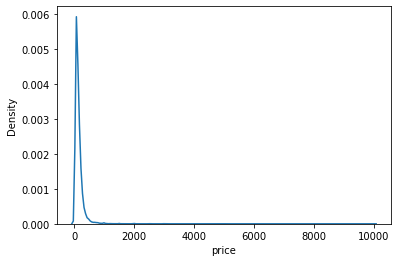

In [13]:
sns.kdeplot(data['price'])

In [14]:
# from above kde plot we can see that it gets skewed after 500, and see that max price is 10000 $ which is outlier so we remove it  

In [15]:
price=data[data.price < 500]

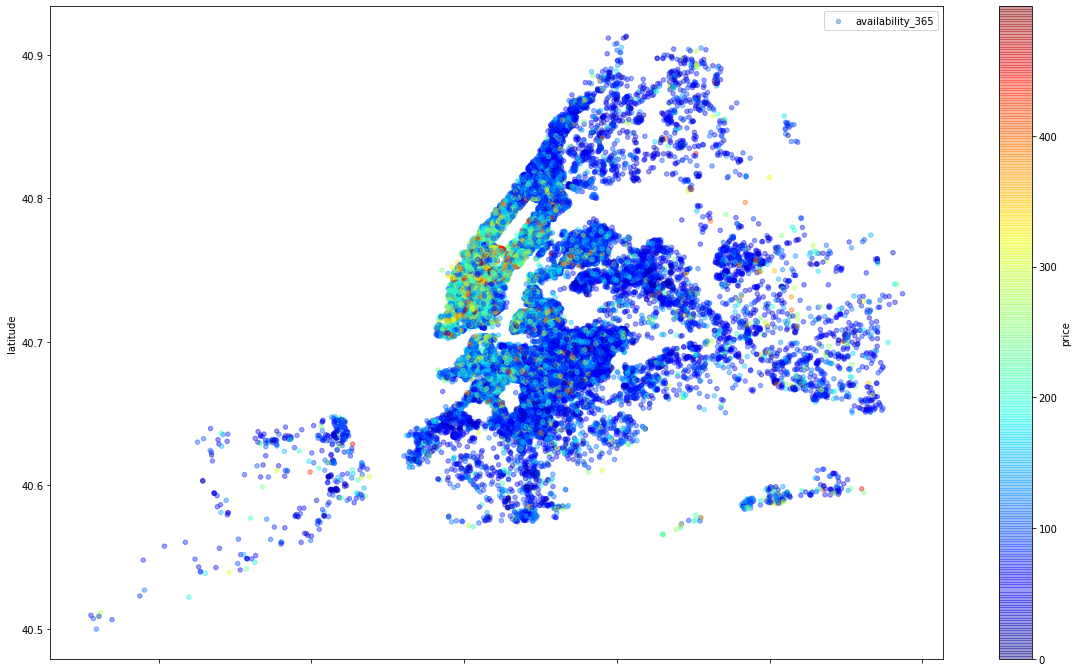

In [16]:
nyc_price=price.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,12))
nyc_price.legend()

In [17]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [18]:
# Average price of Airbnbs in the 5 boroughs of New York City depending on the room type
pivot=data.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')
pivot

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [19]:
# 
pt.bar(pivot,barmode='group')

In [20]:
data['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

In [21]:
data.groupby('neighbourhood_group')['number_of_reviews'].mean()

neighbourhood_group
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Queens           27.700318
Staten Island    30.941019
Name: number_of_reviews, dtype: float64